<a href="https://colab.research.google.com/github/cfreeman22/loan_modeling_project/blob/main/loan_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Modeling Project 
# Which customer is most likely to get a loan?
Presented By Christian Freeman 
Jan 15, 2011  

#Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver
Understanding consumer behavior can quite chanlenging, especially when the product we offer our customers is a service rather than a tangible physical products. In the case of predicting which customer is most likely to get a loan,, I will perform the following:


- Prepare the data for visualization using a customized  module wrangle.py
- Identify patterns and insights 
- Document key observations and relationships between variables 

 
## Goals and summary
My goal in this project is to:

- Identify the characteristics of customers who are more likely to get a loan, and the potential reasons for this behavior.
- Build a ML model to predict which customer may sign up for a loan
So that recommendations are made based on the findings to help increase the chances of giving  a loan the the right customer.
- I will be using Python, Pandas, Matplotlib, Seaborn, and Scikit-Learn libraries to analyse and create ML classification model.

## Initial Questions
* What are unique characteristics of our customers?
* What factors increase their chances of getting a loan ?
* can we predict loan subscribers ?
 
## Executive Summary
### Findings Include:
- Many outliers in Income, Mortgage , and CCAvg colums
- Experience column has  some 0 values as well as some  negative values including -1,-2, -3 . All were converted to 0, since replacing with the mean experience of 20 years did not make sense. This is because  most customers with these values have less than 27 years of age


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  wrangle
import warnings
warnings.filterwarnings('ignore')

In [7]:
raw_data = pd.read_csv('Loan_Modelling.csv')

# New Section

In [8]:
raw_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
loan= raw_data.copy()

In [10]:
loan.shape

(5000, 14)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
cat_var = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
quant_vars = ['Age','Income','CCAvg','Mortgage']
quant_vars2 = ['Age','Income','CCAvg']
target = 'Personal_Loan'

In [15]:
loan["Experience"].replace({-1: 0, -2: 0,-3:0}, inplace=True)

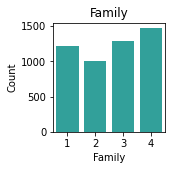

   Family  Count  Percent
1       4   1472    29.44
2       3   1296    25.92
4       1   1222    24.44
3       2   1010    20.20
_________________________________________________________________


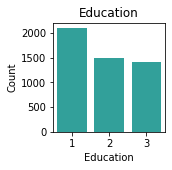

   Education  Count  Percent
1          1   2096    41.92
3          2   1501    30.02
2          3   1403    28.06
_________________________________________________________________


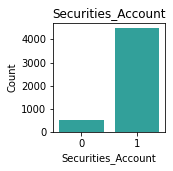

   Securities_Account  Count  Percent
0                   1   4478    89.56
1                   0    522    10.44
_________________________________________________________________


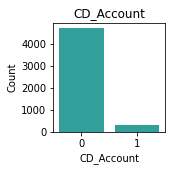

   CD_Account  Count  Percent
0           0   4698    93.96
1           1    302     6.04
_________________________________________________________________


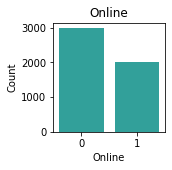

   Online  Count  Percent
1       0   2984    59.68
0       1   2016    40.32
_________________________________________________________________


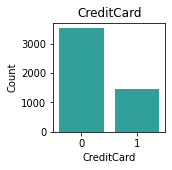

   CreditCard  Count  Percent
0           0   3530     70.6
1           1   1470     29.4
_________________________________________________________________


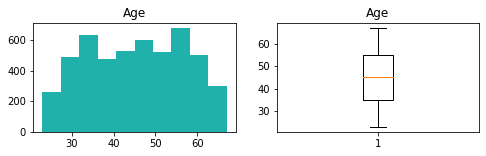

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


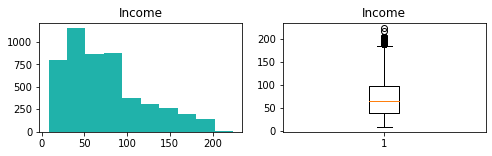

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


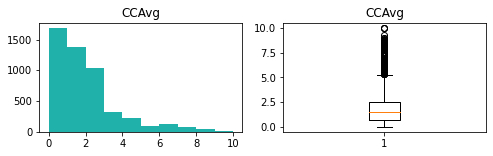

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


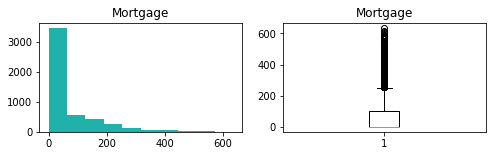

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [16]:
wrangle.explore_univariate(loan, cat_var, quant_vars)

Family 
_____________________

        chi2   p-value  degrees of freedom
0  29.676116  0.000002                   3

observed:
 Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000

expected:
           0        1
0  1330.688  141.312
1  1171.584  124.416
2   913.040   96.960
3  1104.688  117.312


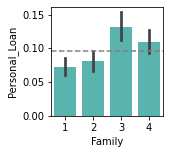


_____________________

Education 
_____________________

         chi2       p-value  degrees of freedom
0  111.239872  6.991474e-25                   2

observed:
 Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000

expected:
           0        1
0  1894.784  201.216
1  1268.312  134.688
2  1356.904  144.096


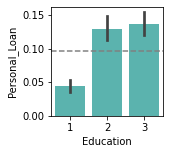


_____________________

Securities_Account 
_____________________

       chi2   p-value  degrees of freedom
0  2.172311  0.140515                   1

observed:
 Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000

expected:
           0        1
0  4048.112  429.888
1   471.888   50.112


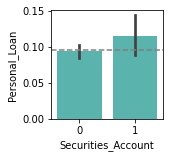


_____________________

CD_Account 
_____________________

         chi2        p-value  degrees of freedom
0  495.904242  7.398298e-110                   1

observed:
 Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000

expected:
           0        1
0  4246.992  451.008
1   273.008   28.992


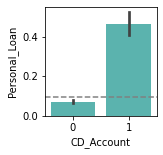


_____________________

Online 
_____________________

       chi2  p-value  degrees of freedom
0  0.156007  0.69286                   1

observed:
 Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000

expected:
           0        1
0  1822.464  193.536
1  2697.536  286.464


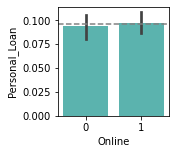


_____________________

CreditCard 
_____________________

       chi2   p-value  degrees of freedom
0  0.021144  0.884386                   1

observed:
 Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000

expected:
          0       1
0  3191.12  338.88
1  1328.88  141.12


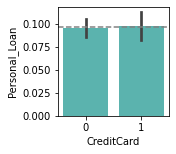


_____________________

Age 
____________________



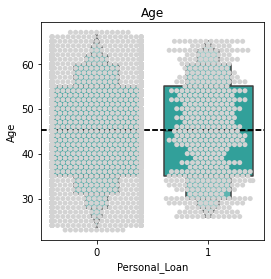

                count       mean        std   min   25%   50%   75%   max
Personal_Loan                                                            
0              4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0  67.0
1               480.0  45.066667  11.590964  26.0  35.0  45.0  55.0  65.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1102125.0, pvalue=0.564396456253154)

____________________

Income 
____________________



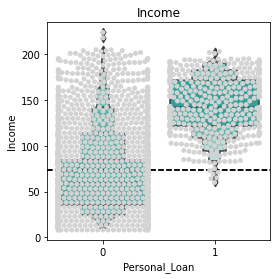

                count        mean        std   min    25%    50%    75%    max
Personal_Loan                                                                 
0              4520.0   66.237389  40.578534   8.0   35.0   59.0   84.0  224.0
1               480.0  144.745833  31.584429  60.0  122.0  142.5  172.0  203.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=169085.0, pvalue=1.0351753680641503e-203)

____________________

CCAvg 
____________________



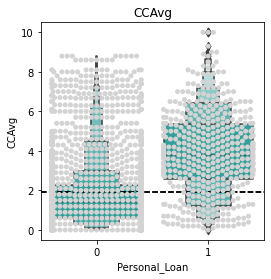

                count      mean       std  min  25%  50%     75%   max
Personal_Loan                                                         
0              4520.0  1.729009  1.567647  0.0  0.6  1.4  2.3000   8.8
1               480.0  3.905354  2.097681  0.0  2.6  3.8  5.3475  10.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=417591.0, pvalue=3.5994500226523643e-109)

____________________

Mortgage 
____________________



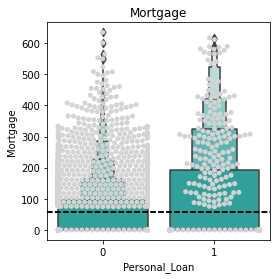

                count        mean         std  min  25%  50%    75%    max
Personal_Loan                                                             
0              4520.0   51.789381   92.038931  0.0  0.0  0.0   98.0  635.0
1               480.0  100.845833  160.847862  0.0  0.0  0.0  192.5  617.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=974814.5, pvalue=7.638092866051238e-06)

____________________



In [17]:
wrangle.explore_bivariate(loan, target, cat_var, quant_vars)

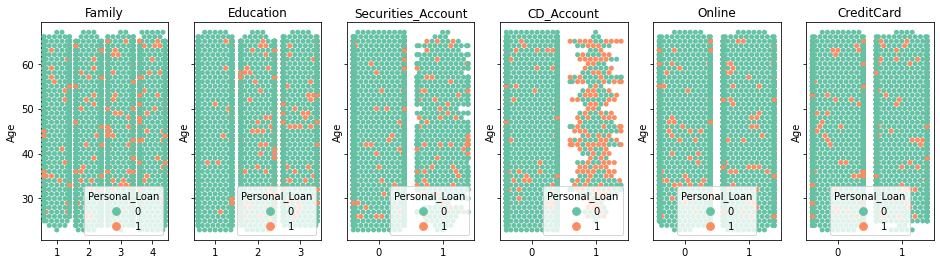

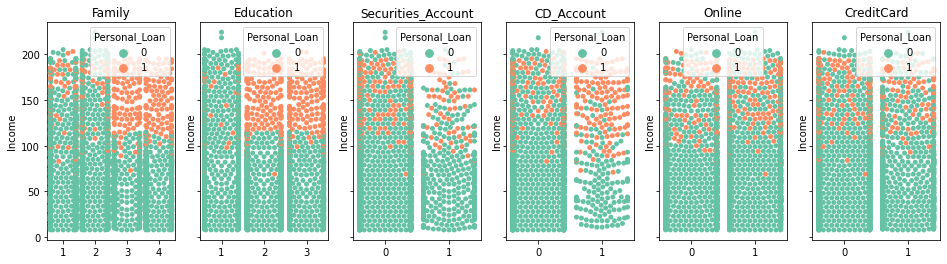

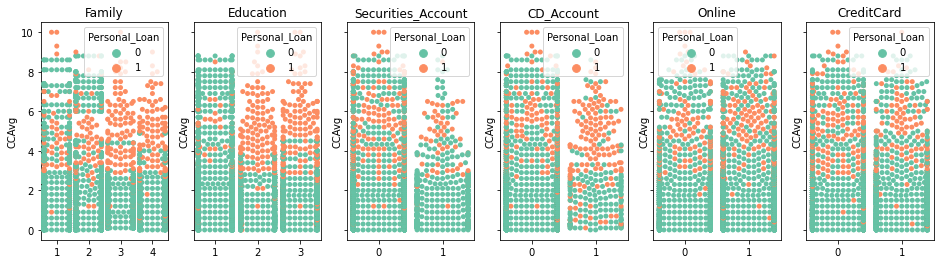

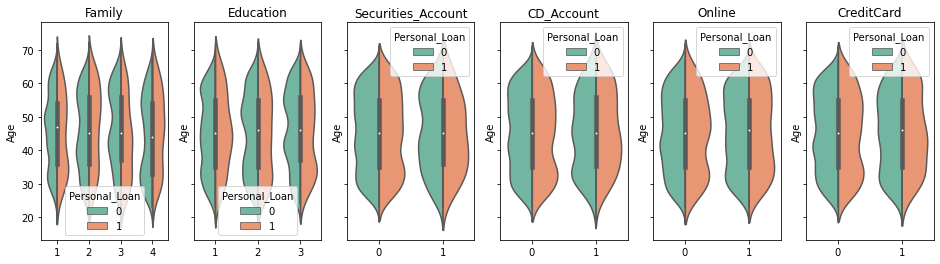

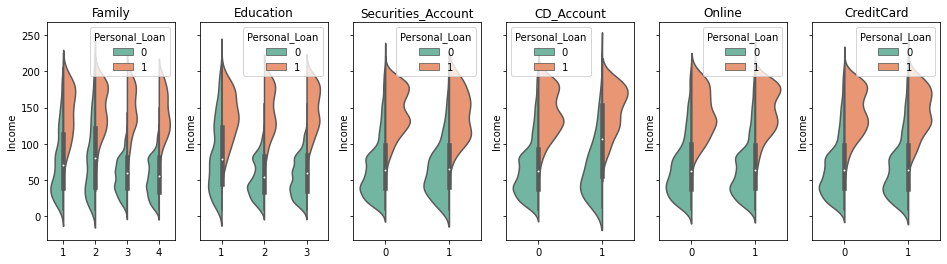

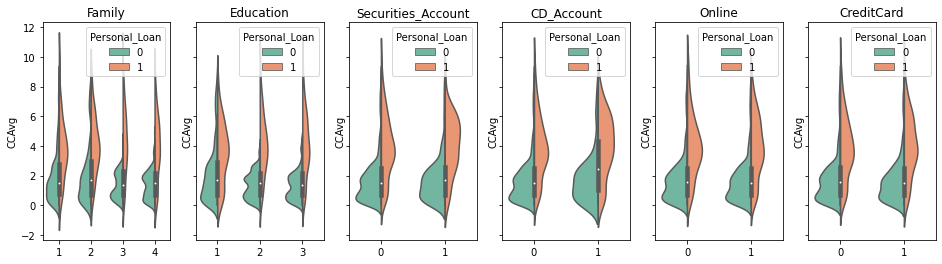

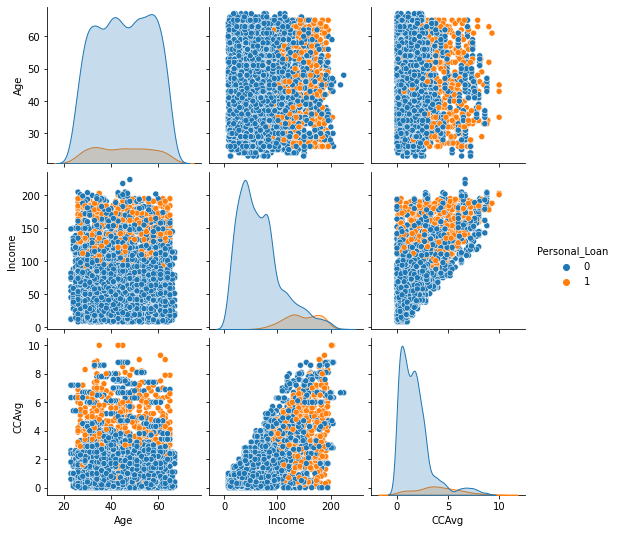

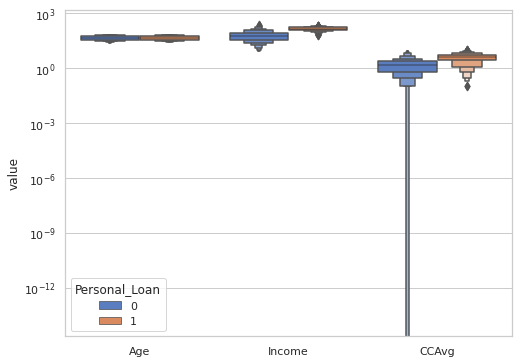

In [18]:
wrangle.explore_multivariate(loan, target, cat_var, quant_vars2)